# Подготовка данных 

Очистка «грязных данных» – одна из основных проблем машинного обучения.

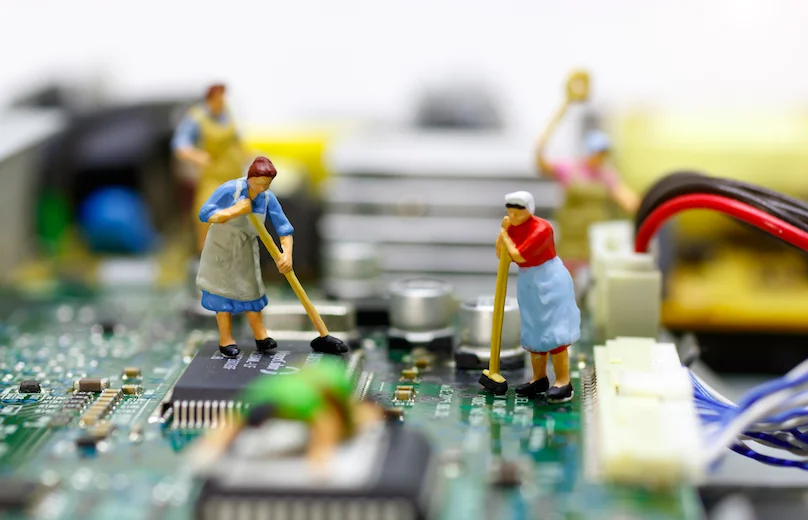

(Источник https://cdn.forbes.ru/)

Очень важно следить за качеством полученных данных. Вам могут встретиться, например, следующие проблемы:

- Пропуски (пропущенные значения). Объекты или признаки, в которых есть пропуски, можно удалять из выборки, но если пропусков довольно много, мы можем потерять таким образом слишком много информации. Кроме того, наличие пропуска само по себе может нести информацию: скажем, это может говорить о систематической проблеме в сборе данных для того или иного сегмента выборки. 

- Выбросы, то есть объекты, которые резко отличаются от большинства остальных. Например, в датасете с информацией о клиентах банка 140-летний человек, очевидно, будет весьма нетипичным. Выбросы могут возникать из-за ошибок при сборе данных или представлять собой реально существующие аномалии. Обычно выбросы лучше удалять, но в некоторых случаях выбросами могут быть важные объекты (например, очень богатые клиенты банка), и тогда их, возможно, стоит отлавливать и обрабатывать отдельно.

- Ошибки разметки. Если, например, вы собираете данные с помощью разметчиков-людей, то вы должны быть готовы к тому, что часть таргетов будет отмечена неправильно. Даже если не думать о том, что не все из разметчиков совершенно честные и старательные, задача может оказаться для них сложной.

- Data drift. С течением времени данные могут меняться. Например, может измениться схема сбора данных, и они начнут приходить в формате, который вообще не обрабатывается моделью. Или же может поменяться распределение данных: скажем, если вы делали образовательный сервис для студентов, а к вам стали приходить и более зрелые люди. Data drift – это суровая реальность для любой системы, которая решает не сиюминутную задачу, поэтому нужно уметь мониторить распределение данных и, если нужно, обновлять модель.

### Этапы подготовки данных

- Техническая очистка. Данные надо проверить на наличие типовых проблем: дубли, пропуски, противоречия. 

- Семантическая очистка. Технически идеальные данные могут содержать смысловые ошибки. Например, выбросы. Для их очистки используются статистические методы.

- Обогащение/генерация данных. Данные желательно обогащать дополнительными аналитическими признаками. Это может улучшить качество работы моделей. 

### Рассмотрим пример

В примере мы рассмотрим данные о кражах в магазинах самообслуживания

**DataSet2_1** – Данные о кражах в магазинах самообслуживания (задача классификации)

*trustLevel* - Индивидуальный уровень доверия клиента. 6: Высочайшая надежность

*totalScanTimeInSeconds* - Общее время в секундах между первым и последним отсканированным продуктом

*grandTotal* - Общая стоимость отсканированных продуктов	

*lineItemVoids* - Количество аннулированных сканирований	

*scansWithoutRegistration* - Количество попыток сканирования без какого-либо сканирования (неудачное сканирование)	

*quantityModification* - Число изменений количества товаров для одного из сканируемых продуктов	

*scannedLineItemsPerSecond* - Среднее количество отсканированных продуктов в секунду

*valuePerSecond* - Средняя общая стоимость отсканированных продуктов в секунду	

*lineItemVoidsPerPosition* - Отношение числа аннулированных сканирований к общему числу аннулированных и не аннулированных сканирований	

*fraud* - Классификатор как мошенничество (1) или не мошенничество (0)

Данные для работы можно найти здесь: https://goo.su/Xx1I

In [68]:
import pandas as pd
import numpy as np

# Set the working directory
import os
os.chdir("C:/Users/Анна/Desktop/ML занятия/HSE ML/HSE ML/DataSets")



In [69]:
#посмотрим на данные
data = pd.read_csv("DataSet2_1.csv", sep="|")

data.head(8)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0
5,1,770,11.09,11,5,2,0.033766,0.014403,0.423077,1
6,3,294,55.63,2,7,1,0.037415,0.189218,0.181818,0
7,2,1545,22.80,0,8,4,0.006472,0.014757,0.000000,0


In [70]:
#количество значений NA
data.isna().sum()

#количество значений NaN
#data.isnull().sum()

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64

In [49]:
#В датафреме про магазины не актуально, но вообще проверить дубликаты можно так:

len(data['trustLevel'])- len(data['trustLevel']. drop_duplicates ())

1873

Теперь поговорим о выбросах. Как их обнаружить? Есть множество вариантов, вы рассмотрим лишь некоторые.

In [50]:
#Посмотреть минимальные и максимальные значения в таблице

data.describe()
# Кванти́ль в математической статистике — значение, которое заданная случайная величина не превышает с фиксированной вероятностью.
# Если вероятность задана в процентах, то квантиль называется процентилем или перцентилем 

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


363      0.01
482      0.03
1180     0.07
475      0.14
591      0.16
        ...  
1641    99.75
805     99.76
807     99.76
1142    99.82
1049    99.96
Name: grandTotal, Length: 1879, dtype: float64


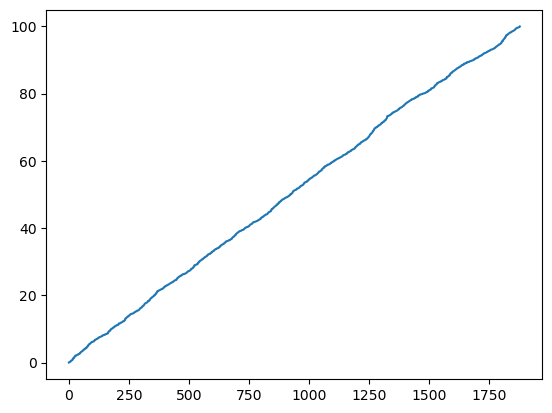

In [51]:
#можно использовать наглядные методы. Например, построим гистограмму:

import matplotlib.pyplot as plt
import seaborn as sns

a = data['grandTotal'].sort_values()
print(a)
plt.plot(list(a))
plt.show()

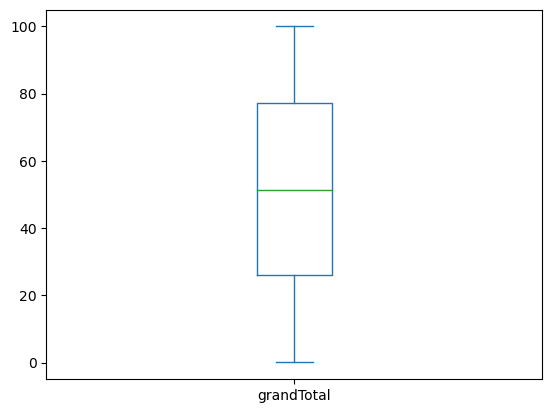

In [52]:
#боксплот

data.grandTotal.plot.box()
plt.show()

In [53]:
#Процентили

lower_bound = data.grandTotal.quantile(q=0.025)
upper_bound = data.grandTotal.quantile(q=0.975)
data[(data.grandTotal < lower_bound) | (data.grandTotal > upper_bound)]

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
21,4,1505,2.70,6,4,0,0.003322,0.001794,1.200000,0
22,4,934,98.54,0,5,2,0.008565,0.105503,0.000000,0
73,3,1393,99.58,1,8,0,0.013640,0.071486,0.052632,0
79,3,1771,2.51,3,1,4,0.005082,0.001417,0.333333,0
94,2,952,0.58,8,5,0,0.016807,0.000609,0.500000,0
...,...,...,...,...,...,...,...,...,...,...
1691,2,681,0.61,3,8,2,0.026432,0.000896,0.166667,0
1724,3,836,97.99,5,9,4,0.017943,0.117213,0.333333,0
1801,3,956,2.36,0,6,5,0.009414,0.002469,0.000000,0
1828,3,1421,2.42,7,8,0,0.019704,0.001703,0.250000,0


In [54]:
#Если и этого не достаточно, можно реализовать фильтр Хэмпеля
def hampel(vals_orig):
    '''Опишем функцию, которая заменяет на nan все значения, 
    у которых разница с медианой больше, чем три медианных абсолютных отклонения.'''
    vals = vals_orig.copy()    
    difference = np.abs(vals.median()-vals)
    median_abs_deviation = difference.median()
    threshold = 3 * median_abs_deviation
    outlier_idx = difference > threshold
    vals[outlier_idx] = np.nan
    return(vals)

hampel(data['grandTotal'])

0       54.70
1       27.36
2       62.16
3       92.31
4       81.53
        ...  
1874    76.03
1875    41.89
1876    41.83
1877    62.68
1878    38.03
Name: grandTotal, Length: 1879, dtype: float64

In [55]:
#на выводе нет NaN-значений, так что выбросов точно нет
hampel(data['grandTotal']).isnull().sum()

0

### Уменьшение размерности данных 
**Убираем колонки у которых дисперсия около нуля**

В данном коде на Python мы используем класс VarianceThreshold из модуля sklearn.feature_selection для выявления и удаления признаков с низкой дисперсией. 

По умолчанию он удаляет все признаки с нулевой дисперсией, то есть признаки, которые имеют одинаковое значение во всех выборках.

Значение порога 0.01 является всего лишь примером; вы можете настроить его в зависимости от вашего набора данных и конкретных потребностей. Выбранные имена признаков сохраняются в переменной important_feature_names, после чего набор данных фильтруется так, чтобы остались только эти важные признаки.

In [56]:
from sklearn.feature_selection import VarianceThreshold

nImportant = VarianceThreshold(threshold=0.01) 
nImportant.fit(data)

# Get the names of important features
important_feature_names = data.columns[nImportant.get_support()]
#get_support - Get a mask, or integer index, of the features selected.

# Filter the dataset to include only important features
data = data[important_feature_names]
data

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0
...,...,...,...,...,...,...,...,...,...,...
1874,1,321,76.03,8,7,2,0.071651,0.236854,0.347826,0
1875,1,397,41.89,5,5,0,0.065491,0.105516,0.192308,1
1876,4,316,41.83,5,8,1,0.094937,0.132373,0.166667,0
1877,2,685,62.68,1,6,2,0.035036,0.091504,0.041667,0


Теперь попробуем удалить колонки, если между ними есть явная корреляция.

In [57]:
# Убираем колонки с корреляцией >0.75
correlation_matrix = data.corr() #строим корреляционную матрицу

high_correlation_columns = (correlation_matrix.abs() > 0.75).sum() > 1
high_correlation_columns = high_correlation_columns[high_correlation_columns].index.tolist()
data = data.drop(columns=high_correlation_columns)

data

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0
...,...,...,...,...,...,...,...,...,...,...
1874,1,321,76.03,8,7,2,0.071651,0.236854,0.347826,0
1875,1,397,41.89,5,5,0,0.065491,0.105516,0.192308,1
1876,4,316,41.83,5,8,1,0.094937,0.132373,0.166667,0
1877,2,685,62.68,1,6,2,0.035036,0.091504,0.041667,0


### Введение атрибутов 

Введение новых атрибутов — это метод использования необработанных, неструктурированных атрибутов для их потенциального использования в анализе. Изменение пространства атрибутов часто является обязательной процедурой, т. к. не- обработанное пространство атрибутов, как правило, переполнено неструктурированными и неважными данными, что часто приводит к шуму. Введение новых  атрибутов — важный этап, на котором используются знания эксперта с целью обработки множества исходных данных с учетом особенностей рассматриваемой предметной области. 

### Введенные вычислимые показатели

*ne_otm*- Количество неотменённых заказов	= totalScanTimeInSeconds * scannedLineItemsPerSecond

*otm_i_ne_otm* - Отношение количества аннулированных сканирований к не аннулированным	= lineItemVoids + ne_otm

*sec_na_1_udach_scan* -	Отношение общего времени к количеству удачных сканирований	= totalScanTimeInSeconds / otm_i_ne_otm

*udach_i_neudach_scan* - Количество удачных и неудачных сканирований	= otm_i_ne_otm + scansWithoutRegistration

*dolya_neudach_scan* - Отношение количества удачных сканирований к неудачным	= scansWithoutRegistration / udach_i_neudach_scan

*sec_na_1_scan* - Отношение общего времени в магазине к общему количеству сканирований	= totalScanTimeInSeconds / udach_i_neudach_scan

In [58]:
data_mod = data.copy() #создадим новый датафрейм для работы
data_mod["ne_otm"] = data_mod["totalScanTimeInSeconds"] * data_mod["scannedLineItemsPerSecond"]
data_mod["otm_i_ne_otm"] = data_mod["lineItemVoids"] + data_mod["ne_otm"]
data_mod["sec_na_1_udach_scan"] = data_mod["totalScanTimeInSeconds"] / data_mod["otm_i_ne_otm"]
data_mod["udach_i_neudach_scan"] = data_mod["otm_i_ne_otm"] + data_mod["scansWithoutRegistration"]
data_mod["dolya_neudach_scan"] = data_mod["scansWithoutRegistration"] / data_mod["udach_i_neudach_scan"]
data_mod["sec_na_1_scan"] = data_mod["totalScanTimeInSeconds"] / data_mod["udach_i_neudach_scan"]
data_mod

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,ne_otm,otm_i_ne_otm,sec_na_1_udach_scan,udach_i_neudach_scan,dolya_neudach_scan,sec_na_1_scan
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0,29.0,36.0,29.277778,36.0,0.000000,29.277778
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0,14.0,19.0,5.684211,21.0,0.095238,5.142857
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0,13.0,16.0,94.750000,26.0,0.384615,58.307692
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0,29.0,37.0,48.405405,41.0,0.097561,43.682927
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0,27.0,30.0,14.333333,37.0,0.189189,11.621622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,1,321,76.03,8,7,2,0.071651,0.236854,0.347826,0,23.0,31.0,10.354839,38.0,0.184211,8.447368
1875,1,397,41.89,5,5,0,0.065491,0.105516,0.192308,1,26.0,31.0,12.806452,36.0,0.138889,11.027778
1876,4,316,41.83,5,8,1,0.094937,0.132373,0.166667,0,30.0,35.0,9.028571,43.0,0.186047,7.348837
1877,2,685,62.68,1,6,2,0.035036,0.091504,0.041667,0,24.0,25.0,27.400000,31.0,0.193548,22.096774


### Проверка значимости качества данных

Для того, чтобы воочию увидеть результаты проделанной нами работы, построим на наших данных модель и сравним качество модели на исходных данных и на модифицированных.

Используем уже знакомую вам модель - Метод опорных векторов(SVM).

##### Support Vector Machine

svm.LinearSVC([penalty, loss, dual, tol, C, ...])

**Метод опорных векторов** (англ. support vector machine, SVM) — один из наиболее популярных методов обучения, который применяется для решения задач классификации и регрессии. Основная идея метода заключается в построении гиперплоскости, разделяющей объекты выборки оптимальным способом (как и у многих других подобных методов).

Алгоритм работает в предположении, что чем больше расстояние (зазор) между разделяющей гиперплоскостью и объектами разделяемых классов, тем меньше будет средняя ошибка классификатора.

Подробнее о моделях мы поговорим на семинаре 4. 

Строгий вывод постановки задачи SVM можно прочитать [тут](https://www.mit.edu/~9.520/spring08/Classes/class05.pdf) или в [лекции К.В. Воронцова.](http://machinelearning.ru/wiki/images/archive/a/a0/20150316112120!Voron-ML-Lin-SVM.pdf)


В нашей задаче мы проделаем классификацию по колонке "fraud", которая имеет только 2 класса: 0 и 1.
Соответственно, мы обсуждаем с вами обсуждаем **двухклассовую** классификацию.

Напомним, что входные переменные, описывающие рассматриваемые объекты, называют **предикторами** (независимыми переменными) и обозначают *X1,X2, ...,Xp*.

Предикторы также часто называют признаками, а конкретные их значения чаще обозначают маленькими буквами *x1, x2, ..., xp.*

Выходную переменную, основывающуюся на некоторых значениях предикторов, называют **откликом** или **зависимой переменной** и обозначают *Y*.


In [59]:
n = data.shape[0] #количество строк в датафрейме
t = round(n * 0.8)
X = data.drop(columns=["fraud"]) #убираем колонку fraud 
y = data["fraud"] #и выделяем в отдельную переменную. X - признаки, Y - это наш отклик.
X_mod = data_mod.drop(columns=["fraud"])
y_mod = data_mod["fraud"]

#Разбиваем данные на обучающую и тестовую выборки в отношении 80/20
#Если это делать вручную, то получится что-то такое:
# data_train = X[:t]
# data_test = X[t:]
# y_train = y[:t]
# y_test = y[t:]

# data_train_mod = X_mod[:t]
# data_test_mod = X_mod[t:]
# y_train_mod = y_mod[:t]
# y_test_mod = y_mod[t:]

In [77]:
#но можно сделать проще:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_mod_train, X_mod_test, y_mod_train, y_mod_test = train_test_split(X_mod, y_mod, test_size=0.2, random_state=42)


#### Метод опорных векторов в задаче классификации



In [78]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svm_classifier = LinearSVC() 
svm_classifier.fit(X_train, y_train)

c:\ProgramData\anaconda3\envs\MNE_env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\MNE_env\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

Теперь применим нашу модель к тестовой выборке

In [79]:
res_raw_data = svm_classifier.predict(X_test)
res_raw_data

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Оценим качество работы модели.
В данном случае мы используем самую простую метрику оценки качества модели - Accuracy.

Что такое Accuracy наглядно:

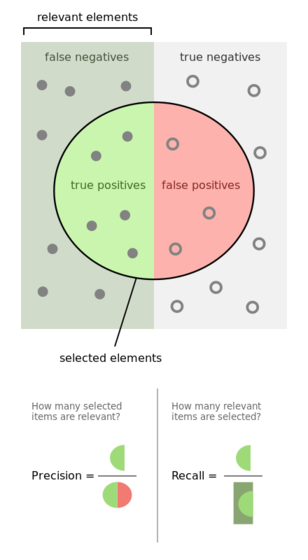

$accuracy = \frac {TP + TN} {TP + TN + FP + FN}$ 

Другие метрики мы рассмотрим на следующих практических занятиях.

In [80]:
accuracy_raw = accuracy_score(y_test, res_raw_data)
print("Accuracy on raw data:", accuracy_raw)

Accuracy on raw data: 0.8138297872340425


А теперь, проделаем то же самое, но на модифицированных данных:

In [81]:
svm_classifier_mod = LinearSVC() 
svm_classifier_mod.fit(X_mod_train, y_mod_train)
res_mod_data = svm_classifier_mod.predict(X_mod_test)

c:\ProgramData\anaconda3\envs\MNE_env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\MNE_env\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [83]:
accuracy_mod = accuracy_score(y_mod_test, res_mod_data)
print("Accuracy on modified data:", accuracy_mod)

Accuracy on modified data: 0.9680851063829787


Действительно, accuracy на модифицированных данных существенно выше, чем на "сырых".

Теперь попробуйте проделать то же самое сами!

(задание см. в Readme)